In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statsmodels.api as sm

In [103]:
performance_metrics = pd.read_excel('Cleaned Dataset.xlsx', sheet_name='Ops People Data')
survey = pd.read_excel('Ball Corp Dataset 2.xlsx', sheet_name='survey')

In [104]:
survey.head()

,Year,Plant,Condition,Career Advancement,Flexibility/Wellbeing,Inclusion,Manager Effectiveness,Retention Driver,Safety,Senior Leadership,Sustainable Engagement,Training & Development,Vision & Direction
0,2022,Benchmark,Favorable,73.542554,81.650646,84.275867,89.195991,70.311351,77.427743,58.553537,80.843619,71.521593,83.742816
1,2022,Benchmark,Unfavorable,16.156440,12.692096,7.277710,6.212236,13.152734,16.051569,15.517794,12.569147,18.665193,8.307886
2,2022,Plant_01,Favorable,66.810345,67.241379,75.862069,88.362069,66.379310,90.948276,32.758621,74.662669,65.517241,63.362069
3,2022,Plant_01,Unfavorable,18.103448,19.827586,9.482759,6.034483,12.931034,6.896552,34.051724,15.544728,18.534483,20.258621
4,2022,Plant_02,Favorable,62.874251,61.676647,75.149701,81.366785,63.030303,49.101796,39.759036,68.911574,55.688623,74.718635


In [105]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    68 non-null     int64  
 1   Plant                   68 non-null     object 
 2   Condition               68 non-null     object 
 3   Career Advancement      68 non-null     float64
 4   Flexibility/Wellbeing   34 non-null     float64
 5   Inclusion               68 non-null     float64
 6   Manager Effectiveness   68 non-null     float64
 7   Retention Driver        68 non-null     float64
 8   Safety                  68 non-null     float64
 9   Senior Leadership       68 non-null     float64
 10  Sustainable Engagement  68 non-null     float64
 11  Training & Development  34 non-null     float64
 12  Vision & Direction      68 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 7.0+ KB


In [106]:
performance_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Period               240 non-null    object 
 1   Plant                240 non-null    object 
 2   Staffing %           240 non-null    float64
 3   Absenteeism %        240 non-null    float64
 4   Turnover %           240 non-null    float64
 5   Turnover 1st Year %  240 non-null    float64
 6   Tenure <2 %          240 non-null    float64
 7   Tenure >10 %         240 non-null    float64
 8   Efficiency %         240 non-null    float64
 9   Spoilage %           240 non-null    float64
 10  TRIR safety          240 non-null    float64
 11  HFI quality          240 non-null    float64
dtypes: float64(10), object(2)
memory usage: 22.6+ KB


In [107]:
# For the performance_metrics df, Loop through columns and multiply numeric values by 100
for col in performance_metrics.columns:
    if pd.api.types.is_numeric_dtype(performance_metrics[col]):
        performance_metrics[col] *= 100

performance_metrics.head()

,Period,Plant,Staffing %,Absenteeism %,Turnover %,Turnover 1st Year %,Tenure <2 %,Tenure >10 %,Efficiency %,Spoilage %,TRIR safety,HFI quality
0,2022_01,Plant_01,-3.12500,7.20,0.0,0.0,86.4,3.2,79.3,1.71,0.0,0.80
1,2022_02,Plant_01,-2.34375,4.52,0.0,0.0,86.3,3.2,81.7,1.51,0.0,0.37
2,2022_03,Plant_01,1.56250,4.56,0.0,0.0,85.2,3.1,81.6,10.33,0.0,0.32
3,2022_04,Plant_01,0.78125,4.50,1.6,50.0,85.8,3.1,78.7,2.43,0.0,0.56
4,2022_05,Plant_01,-1.56250,6.48,3.2,75.0,86.4,2.4,81.6,3.05,0.0,1.52


In [108]:
# Convert 'period' column to datetime format
performance_metrics['Period'] = pd.to_datetime(performance_metrics['Period'], format='%Y_%m')

In [109]:
survey.columns

Index(['Year', 'Plant', 'Condition', 'Career Advancement',
       'Flexibility/Wellbeing', 'Inclusion', 'Manager Effectiveness',
       'Retention Driver', 'Safety', 'Senior Leadership',
       'Sustainable Engagement', 'Training & Development',
       'Vision & Direction'],
      dtype='object')

In [110]:
performance_metrics.columns

Index(['Period', 'Plant', 'Staffing %', 'Absenteeism %', 'Turnover %',
       'Turnover 1st Year %', 'Tenure <2 %', 'Tenure >10 %', 'Efficiency %',
       'Spoilage %', 'TRIR safety', 'HFI quality'],
      dtype='object')

In [111]:
import pandas as pd

# Extract year from 'Period' column
performance_metrics['Year'] = performance_metrics['Period'].dt.year

# Drop the original 'Period' column
performance_metrics.drop(columns=['Period'], inplace=True)

# Aggregate values by mean
performance_metrics_mean = performance_metrics.groupby(['Plant', 'Year']).mean().reset_index()

# Join the two dataframes by 'Plant' and 'Year'
combined_data = pd.merge(survey, performance_metrics_mean, on=['Plant', 'Year'], how='inner')
combined_data.head()

,Year,Plant,Condition,Career Advancement,Flexibility/Wellbeing,Inclusion,Manager Effectiveness,Retention Driver,Safety,Senior Leadership,...,Staffing %,Absenteeism %,Turnover %,Turnover 1st Year %,Tenure <2 %,Tenure >10 %,Efficiency %,Spoilage %,TRIR safety,HFI quality
0,2022,Plant_01,Favorable,66.810345,67.241379,75.862069,88.362069,66.379310,90.948276,32.758621,...,-6.799762,4.696667,1.650000,28.466667,86.575000,2.616667,78.133333,2.652500,0.000000,0.998333
1,2022,Plant_01,Unfavorable,18.103448,19.827586,9.482759,6.034483,12.931034,6.896552,34.051724,...,-6.799762,4.696667,1.650000,28.466667,86.575000,2.616667,78.133333,2.652500,0.000000,0.998333
2,2022,Plant_02,Favorable,62.874251,61.676647,75.149701,81.366785,63.030303,49.101796,39.759036,...,-5.382263,2.860833,1.258333,20.366667,17.641667,28.300000,74.690833,6.005833,227.916667,1.966833
3,2022,Plant_02,Unfavorable,19.161677,27.544910,11.377246,8.720511,13.939394,41.017964,26.204819,...,-5.382263,2.860833,1.258333,20.366667,17.641667,28.300000,74.690833,6.005833,227.916667,1.966833
4,2022,Plant_03,Favorable,75.193798,49.612403,80.144743,87.557534,59.689922,72.093023,32.945736,...,-6.439394,9.703333,2.066667,49.308333,31.141667,32.383333,74.945000,7.281667,287.750000,1.714167


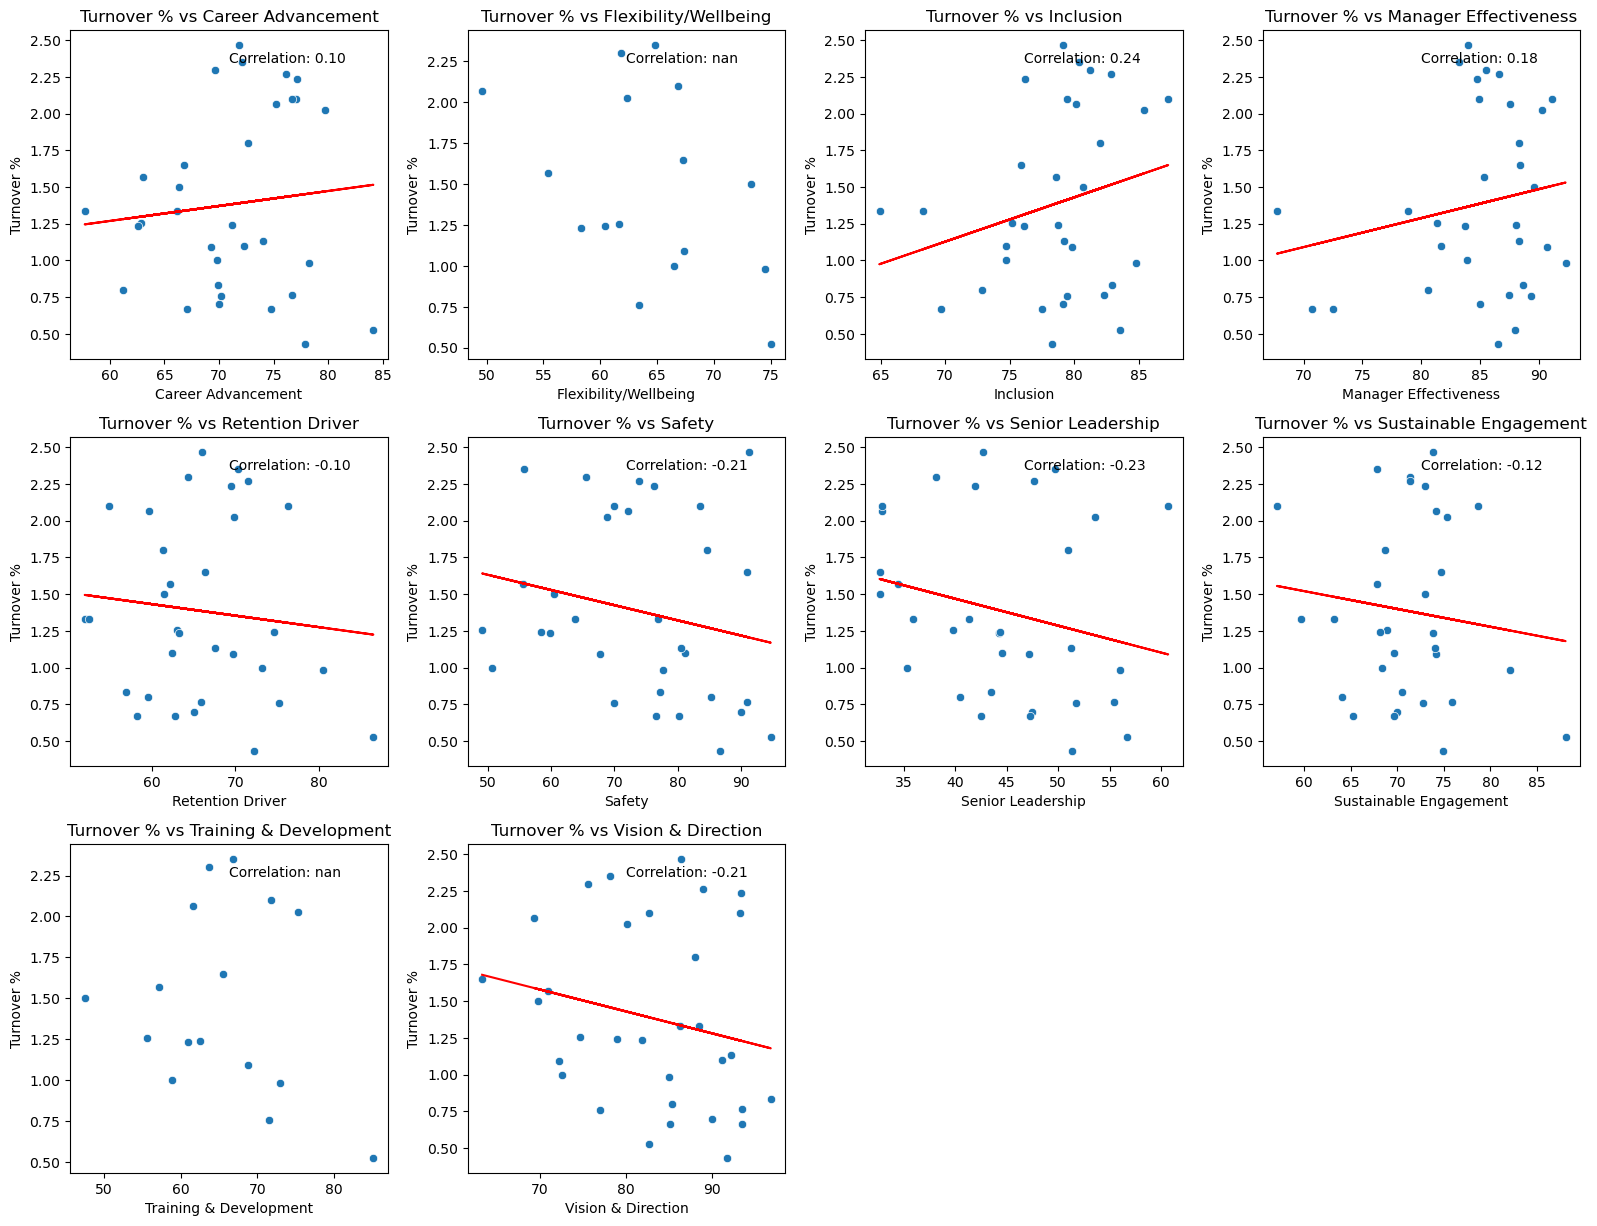

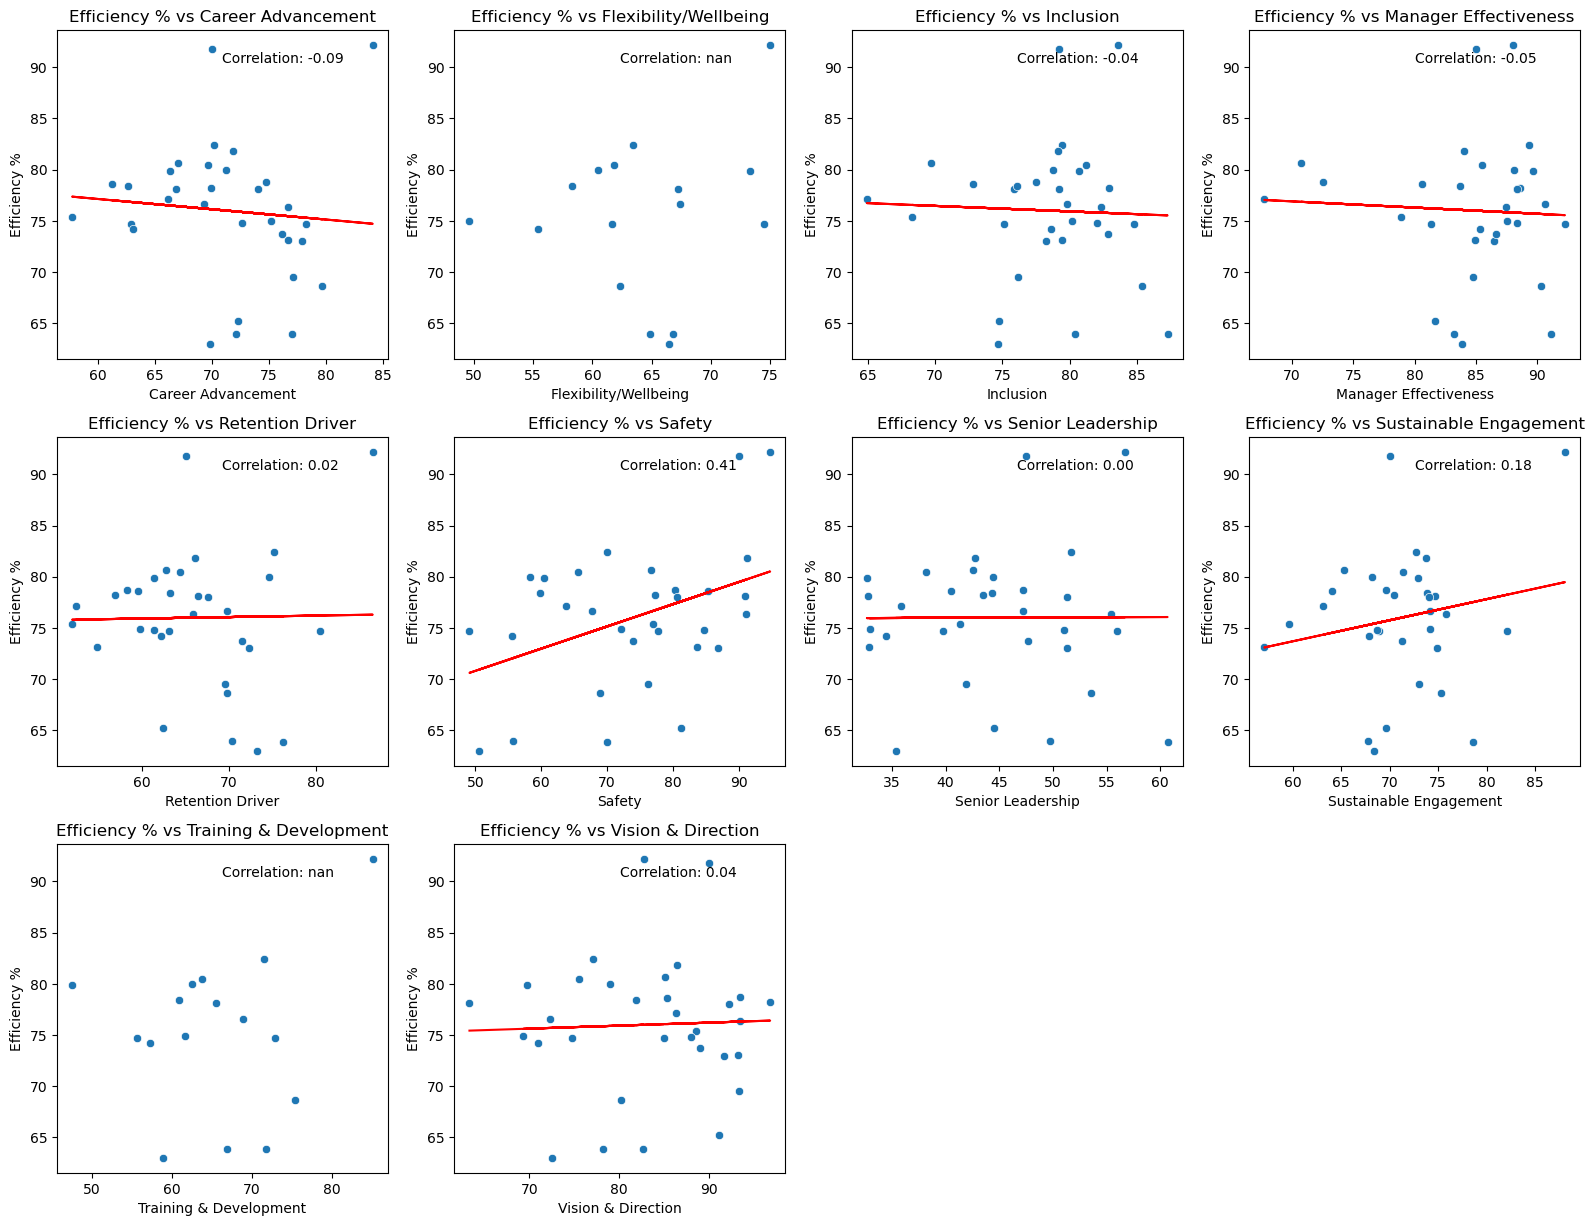

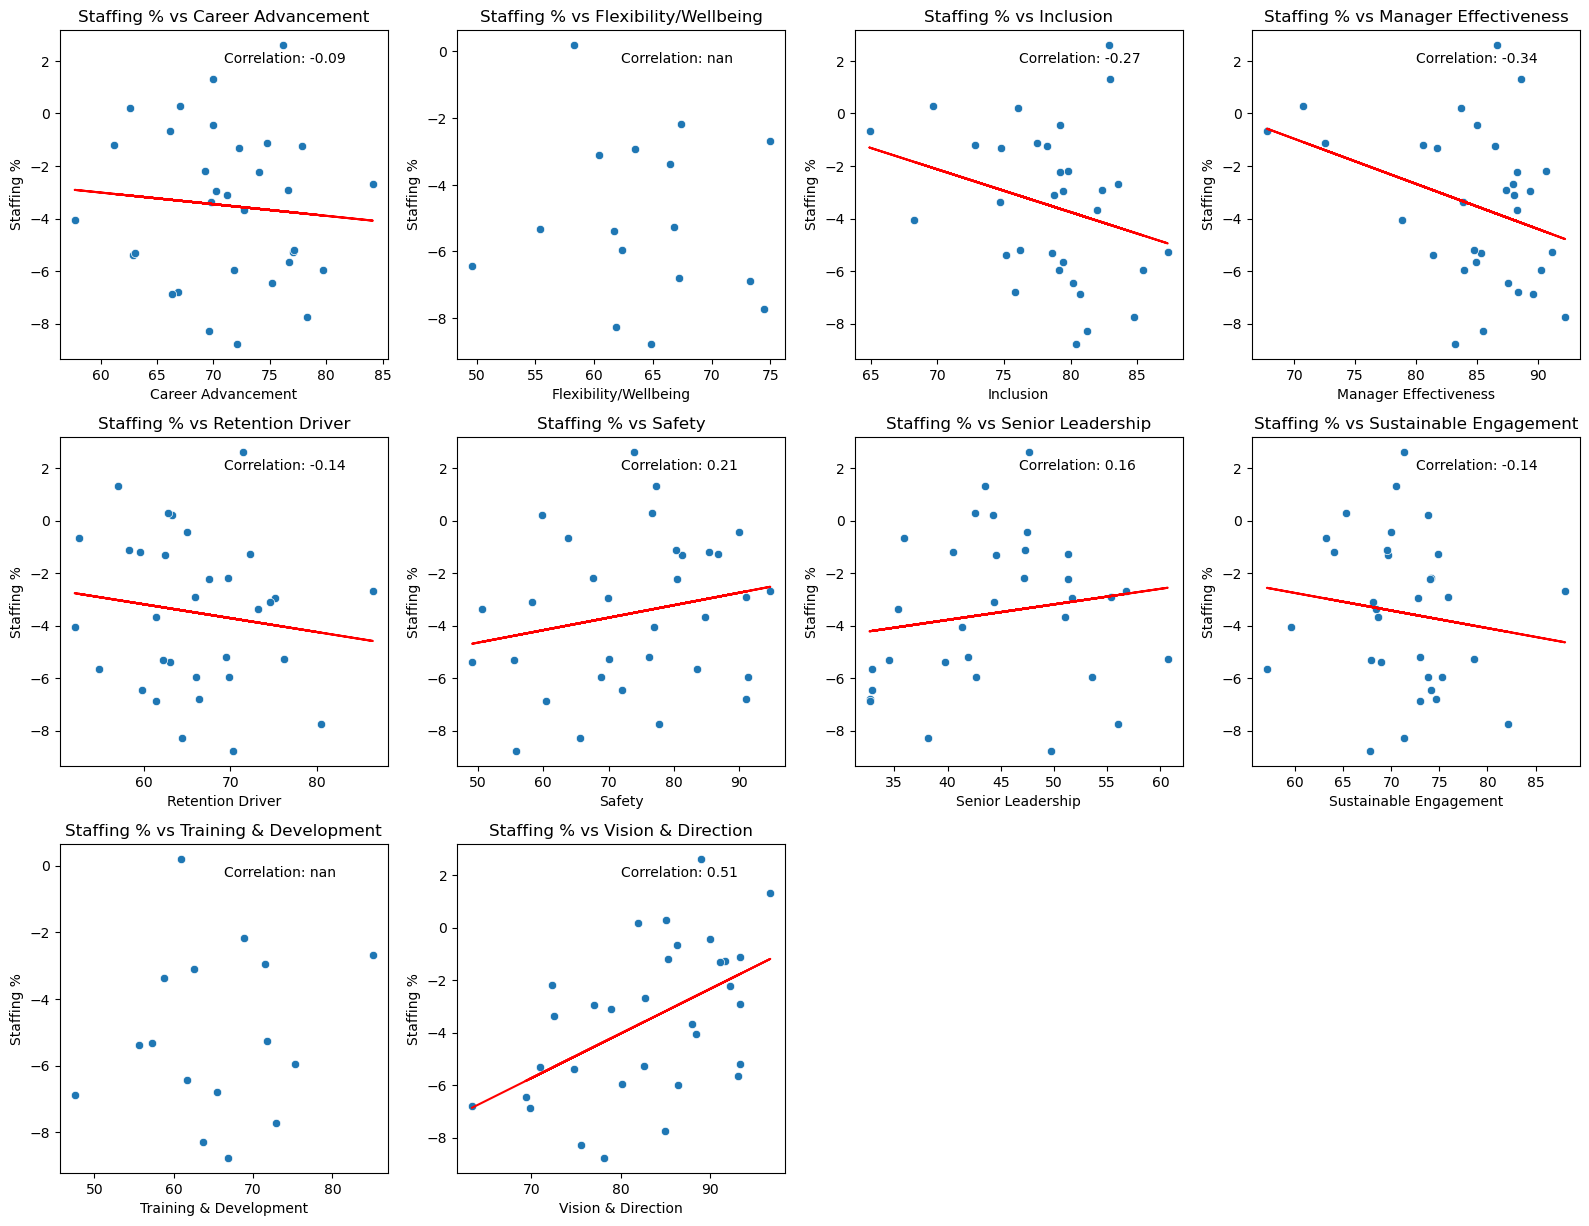

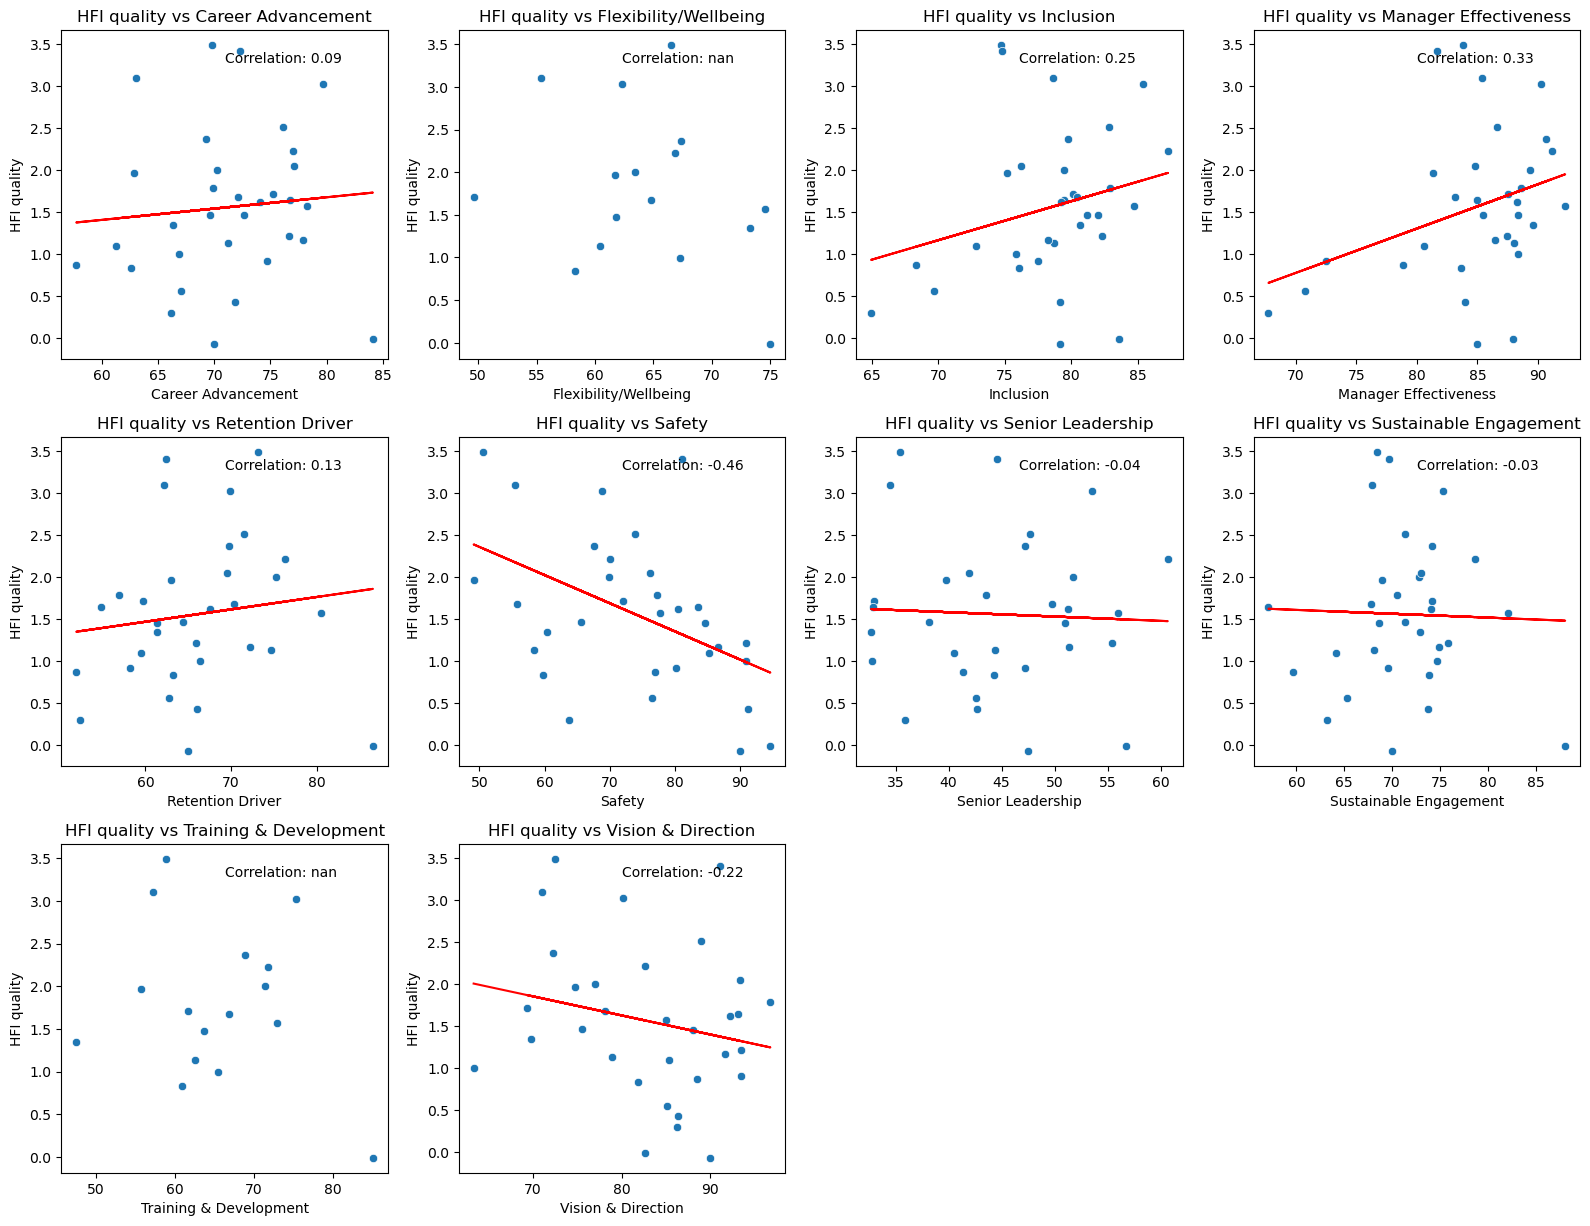

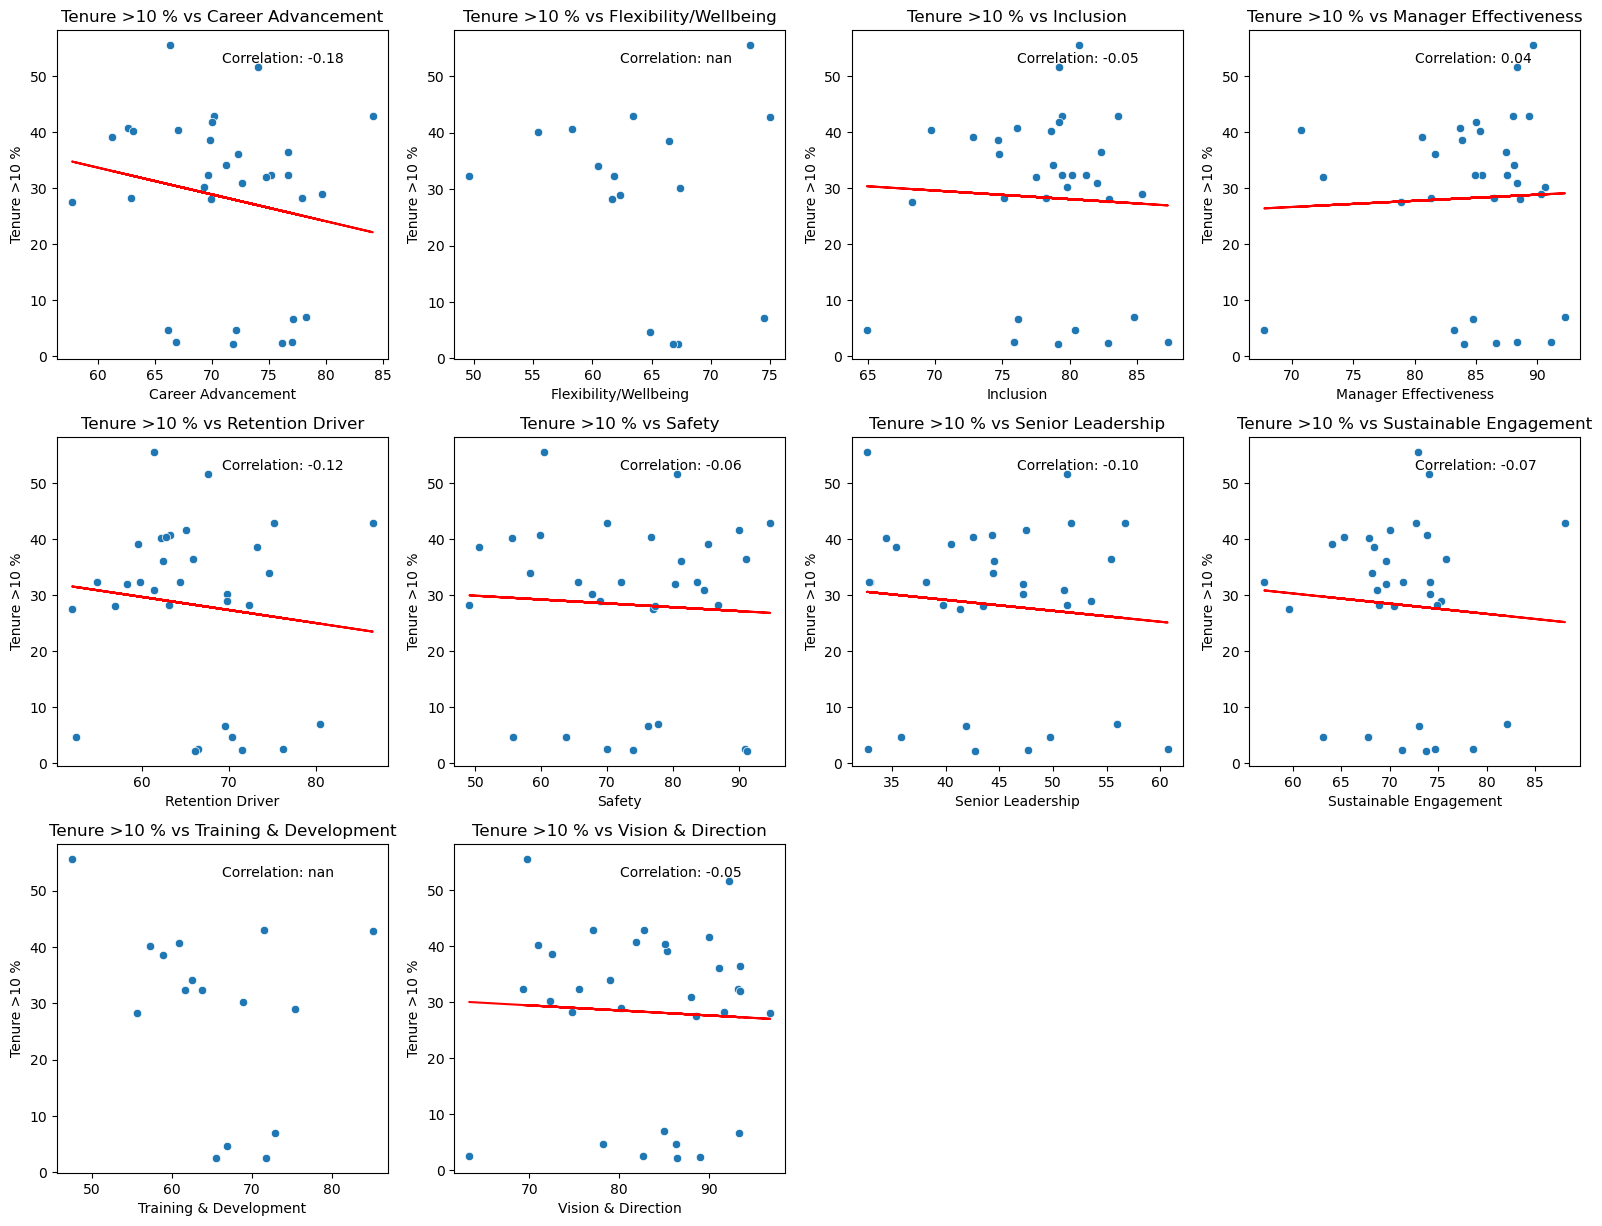

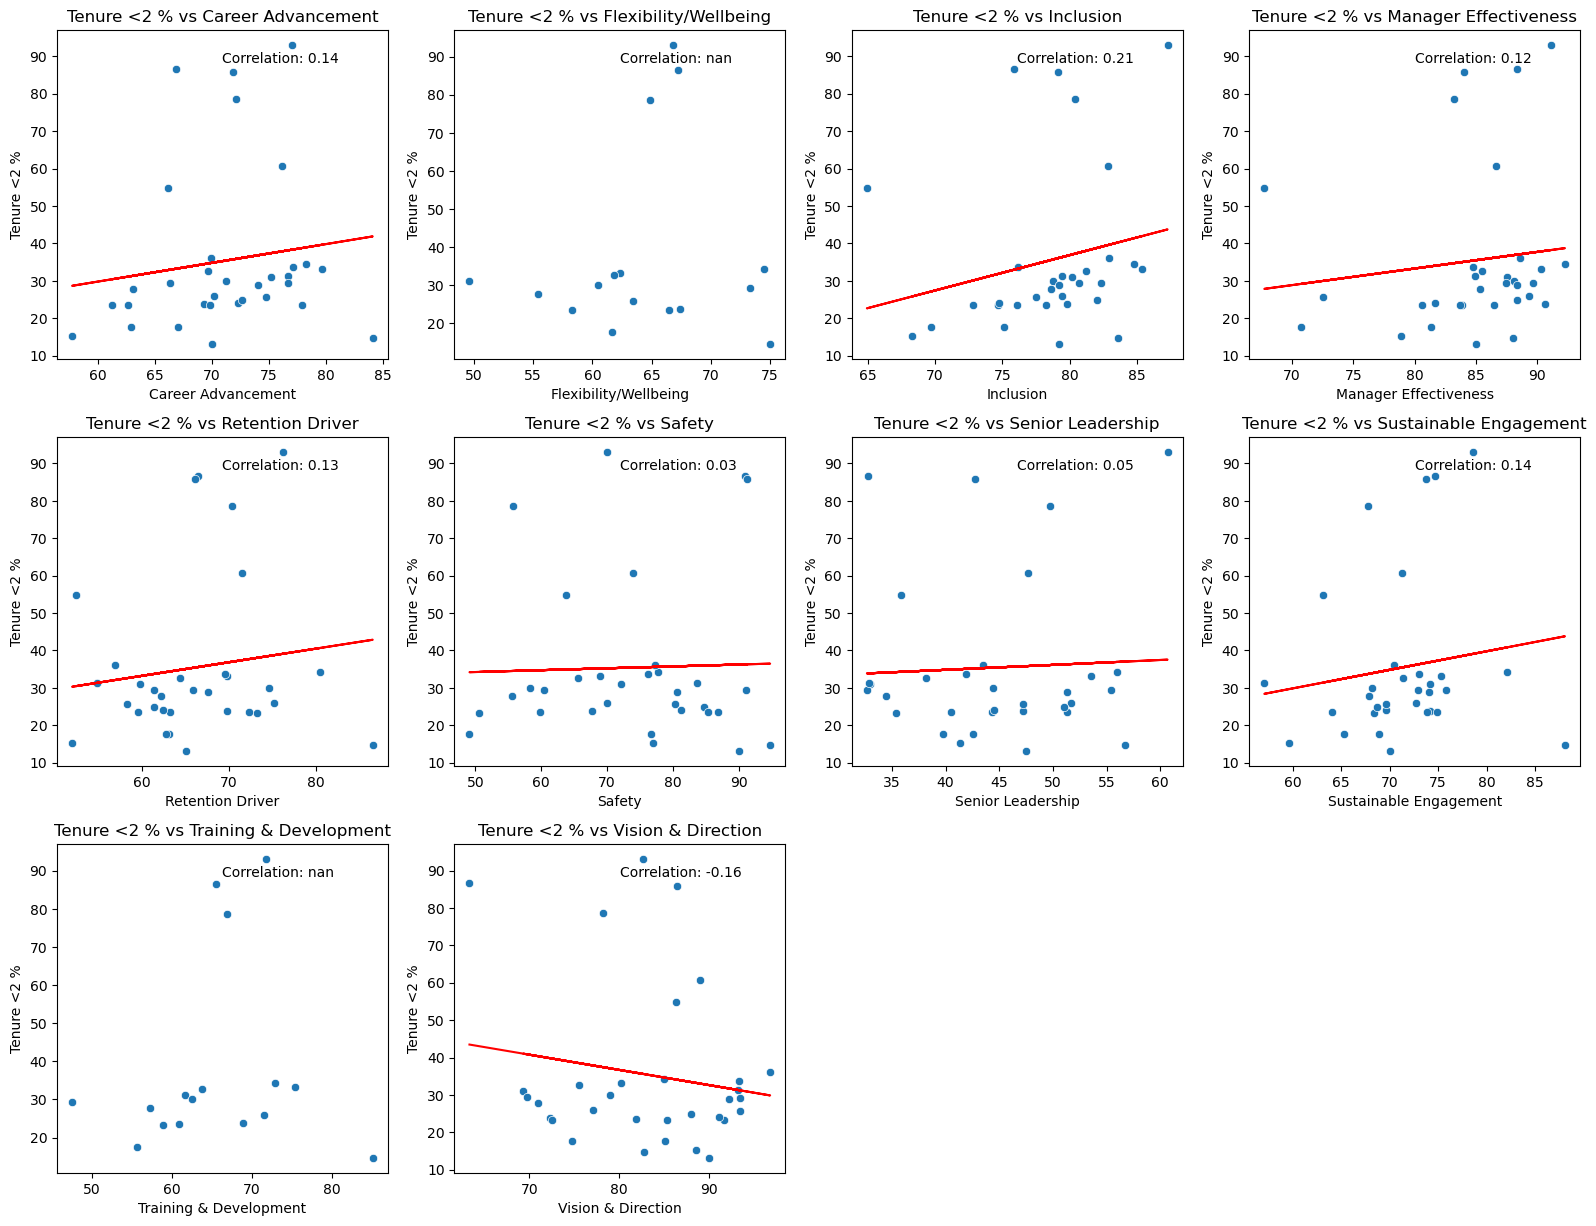

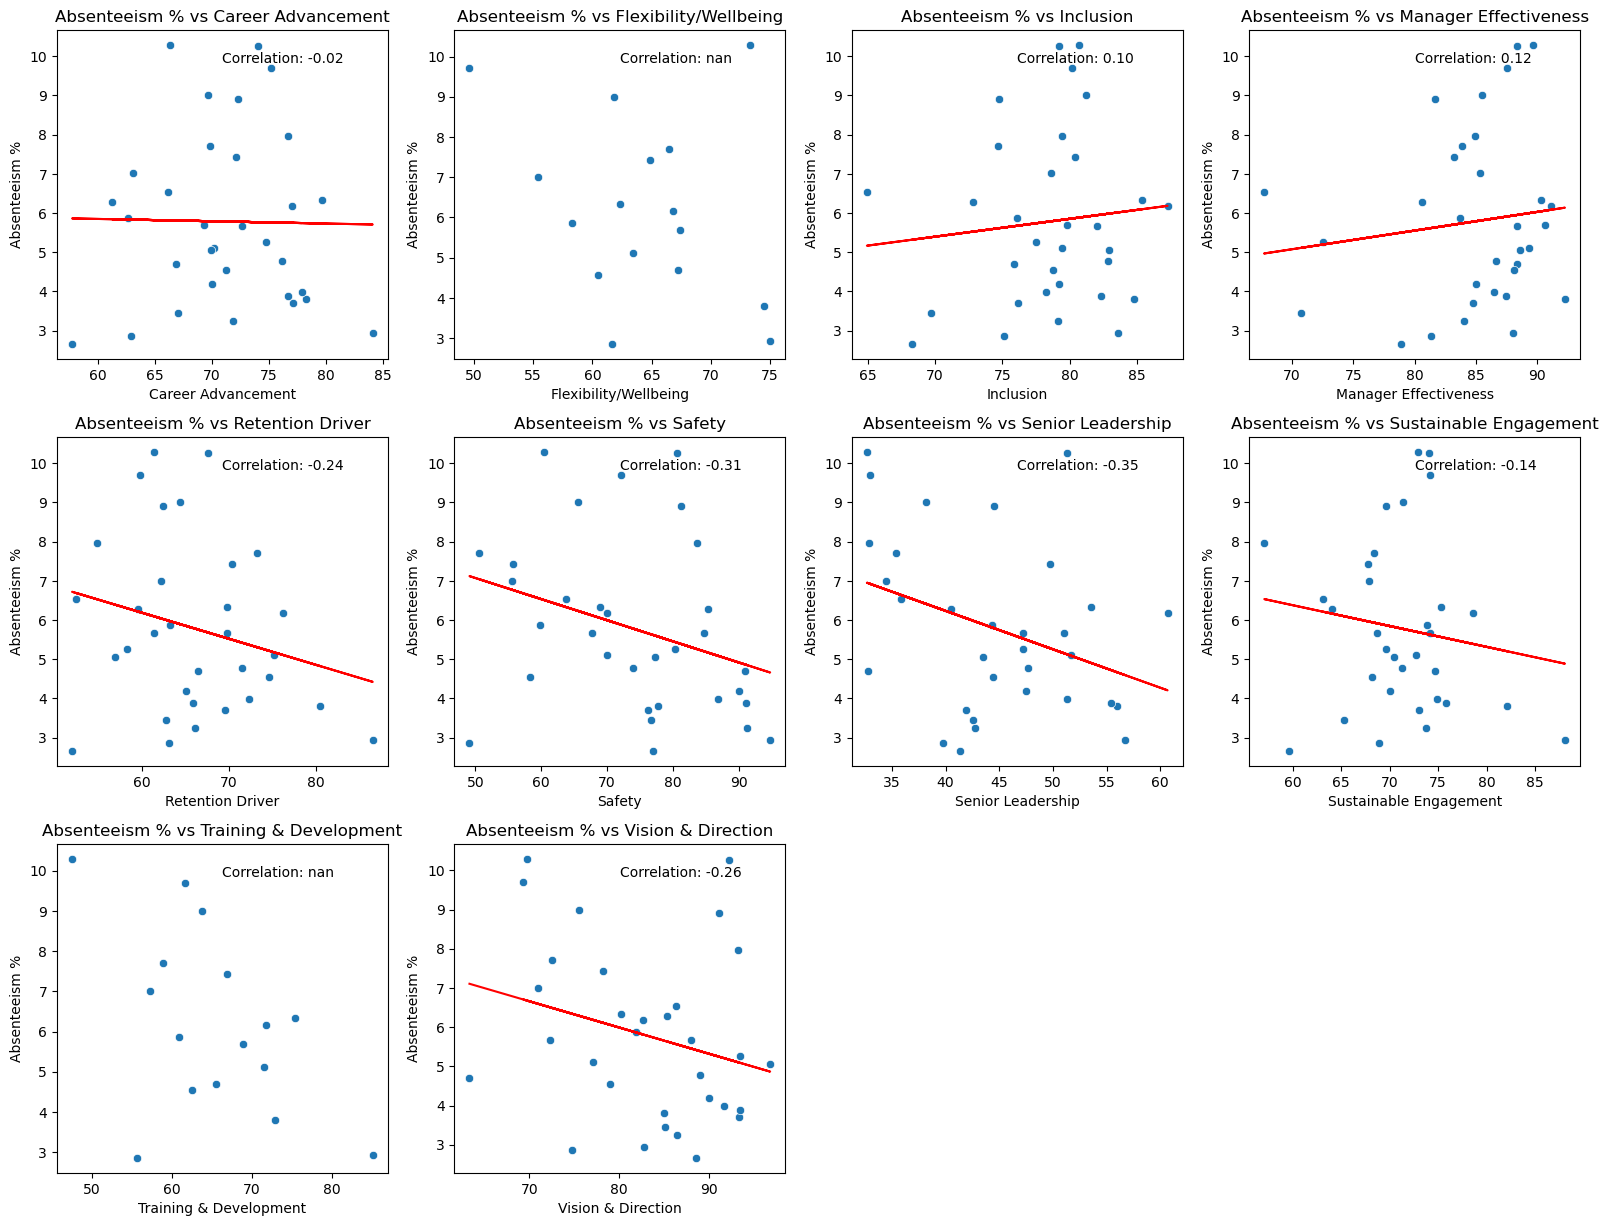

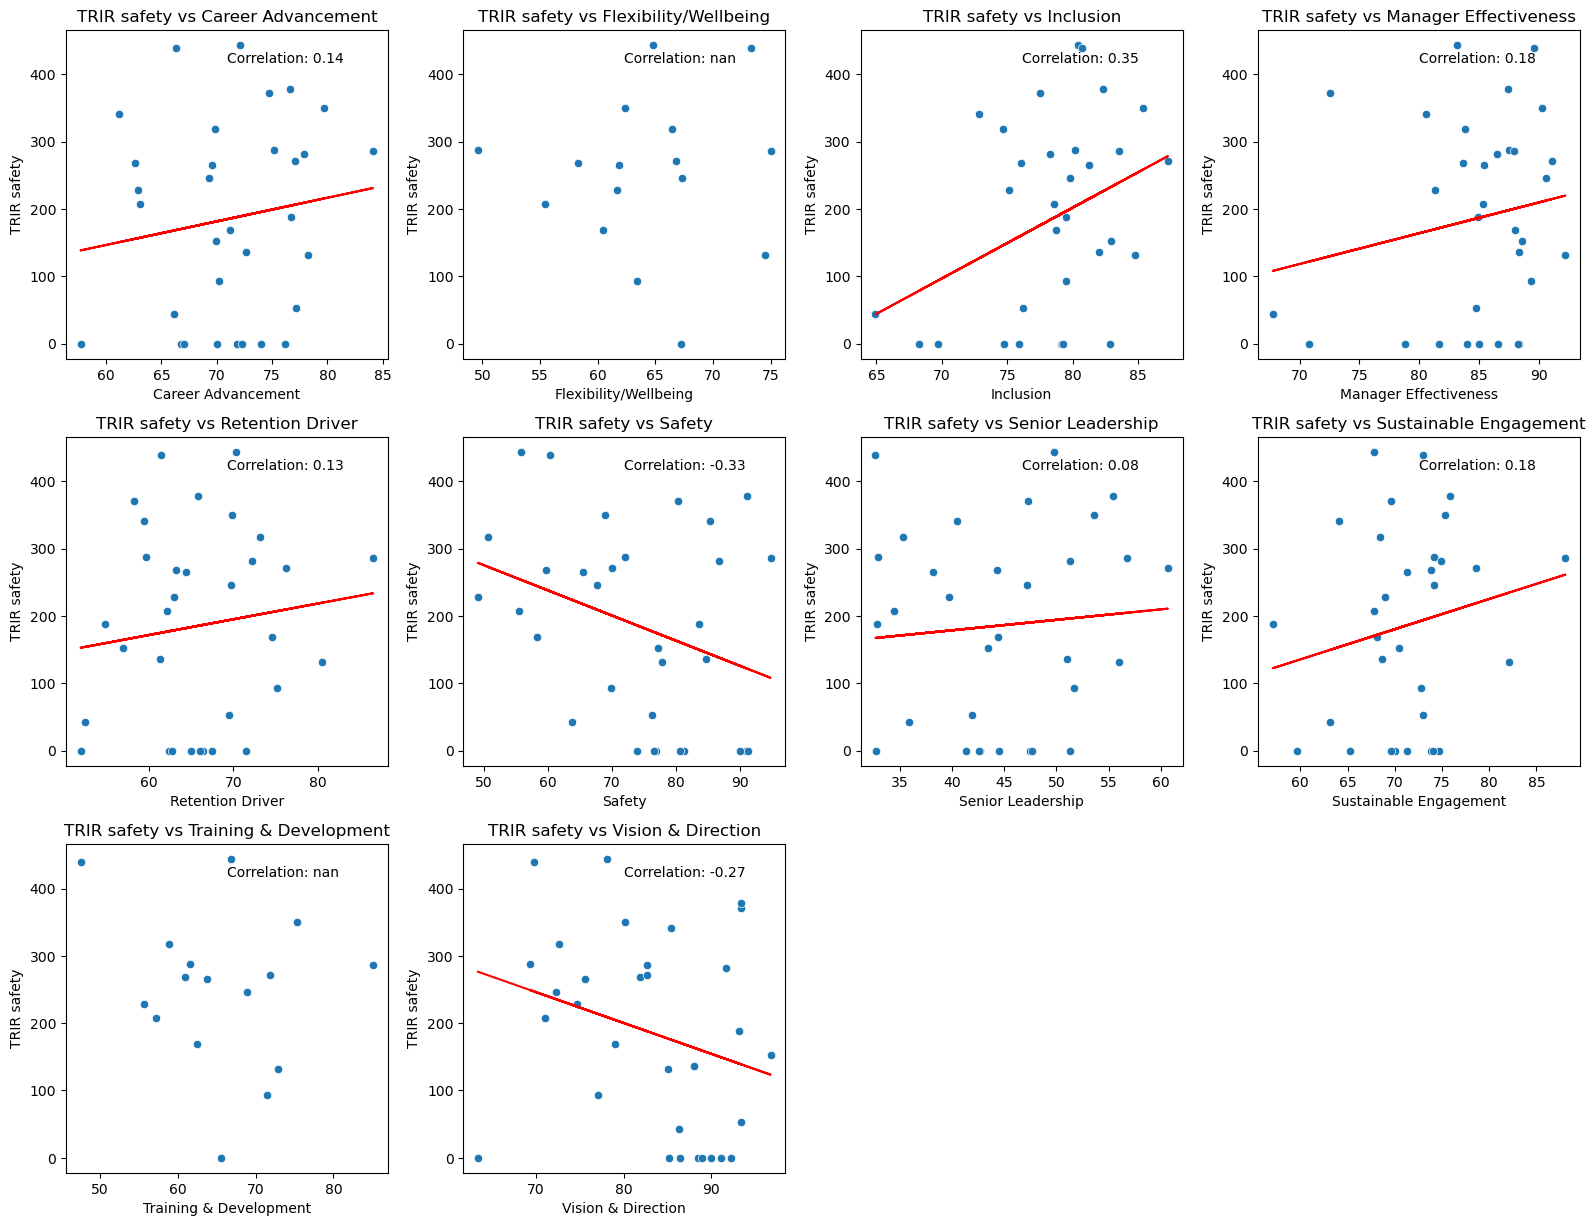

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

combined_data2 = combined_data.copy()
combined_data2 = combined_data2[combined_data2['Condition'] == 'Favorable']

comparison_variables = ['Career Advancement', 'Flexibility/Wellbeing', 'Inclusion',
                        'Manager Effectiveness', 'Retention Driver', 'Safety', 'Senior Leadership',
                        'Sustainable Engagement', 'Training & Development', 'Vision & Direction']

# List of variables of interest
variables_of_interest = ['Turnover %', 'Efficiency %', 'Staffing %', 'HFI quality', 'Tenure >10 %', 'Tenure <2 %', 'Absenteeism %', 'TRIR safety']

# Iterate over each variable of interest
for variable in variables_of_interest:
    # Create a new figure
    plt.figure(figsize=(16, 16))
    
    # Iterate over each comparison variable to create subplots
    for i, comparison_variable in enumerate(comparison_variables, start=1):
        # Create subplot
        plt.subplot(4, 4, i)
        
        # Scatter plot
        sns.scatterplot(x=comparison_variable, y=variable, data=combined_data2)
        
        # Fit a linear regression line
        slope, intercept, r_value, p_value, std_err = linregress(combined_data2[comparison_variable], combined_data2[variable])
        plt.plot(combined_data2[comparison_variable], slope * combined_data2[comparison_variable] + intercept, color='red')
        
        # Add correlation coefficient to the plot
        plt.text(0.5, 0.9, f'Correlation: {r_value:.2f}', fontsize=10, transform=plt.gca().transAxes)
        
        plt.title(f'{variable} vs {comparison_variable}')
        plt.xlabel(comparison_variable)
        plt.ylabel(variable)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()

In [64]:
combined_data2.columns

Index(['Year', 'Plant', 'Condition', 'Career Advancement',
       'Flexibility/Wellbeing', 'Inclusion', 'Manager Effectiveness',
       'Retention Driver', 'Safety', 'Senior Leadership',
       'Sustainable Engagement', 'Training & Development',
       'Vision & Direction', 'Staffing %', 'Absenteeism %', 'Turnover %',
       'Turnover 1st Year %', 'Tenure <2 %', 'Tenure >10 %', 'Efficiency %',
       'Spoilage %', 'TRIR safety', 'HFI quality'],
      dtype='object')

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Calculate Neutral value
combined_data['Neutral'] = 100 - combined_data.groupby(['Plant', 'Year'])['Condition'].apply(lambda x: x.value_counts().get('Favorable', 0))

# List of Y variables
variables = ['Career Advancement', 'Flexibility/Wellbeing']  # Add more variables as needed

# Iterate over each Y variable
for y_var in variables:
    # Create a new figure
    plt.figure(figsize=(12, 8))
    
    # Create stacked bar chart
    stacked_data = combined_data.pivot_table(index='Plant', columns='Year', values=['Favorable', 'Neutral', 'Not Favorable'], aggfunc='sum')
    stacked_data = stacked_data.reindex(sorted(combined_data['Plant'].unique()))
    stacked_data = stacked_data[y_var]
    stacked_data.plot(kind='bar', stacked=True, ax=plt.gca())
    
    # Display values for each plant
    for i, col in enumerate(stacked_data.columns):
        for j, val in enumerate(stacked_data[col]):
            plt.text(i, sum(stacked_data.iloc[:j, i]) + val / 2, str(round(val, 2)), ha='center', va='center')
    
    plt.title(f'Stacked Bar Chart for {y_var}')
    plt.xlabel('Plant')
    plt.ylabel('Value')
    plt.legend(title='Year')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Show plot
    plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\joel3\anaconda\Lib\site-packages\pandas\core\frame.py", line 12020, in _reindex_for_setitem
    reindexed_value = value.reindex(index)._values
                      ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\joel3\anaconda\Lib\site-packages\pandas\core\series.py", line 5094, in reindex
    return super().reindex(**kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\joel3\anaconda\Lib\site-packages\pandas\core\generic.py", line 5289, in reindex
    return self._reindex_axes(
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\joel3\anaconda\Lib\site-packages\pandas\core\generic.py", line 5304, in _reindex_axes
    new_index, indexer = ax.reindex(
                         ^^^^^^^^^^^
  File "C:\Users\joel3\anaconda\Lib\site-packages\pandas\core\indexes\base.py", line 4434, in reindex
    target = self._wrap_reindex_result(target, indexer, preserve_names)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:

### 